<a href="https://colab.research.google.com/github/barsha-1o/BOSTON-HOUSE-PRICE-PREDICTION/blob/main/Boston_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
hd=pd.read_csv("/content/drive/MyDrive/boston.csv")

In [35]:
print(hd)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [36]:
hd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
hd.shape

(506, 14)

In [38]:
hd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [39]:
hd.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [40]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**DATA PREPROCESSING**

In [41]:
#Cheking null values if present
hd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

*  **THERE IS NO NEED TO CLEAN DATA AS WE DON'T HAVE ANY NULL VALUES IN OUR DATASET**  

In [42]:
#Here,our target variable is MEDV.
hd.rename(columns={'MEDV':'PRICE'},inplace=True)


In [43]:
hd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [44]:
hd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


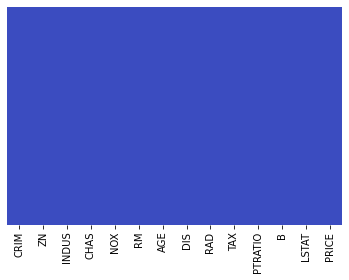

In [45]:
sns.heatmap(hd.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


*   No Null values


# **EDA**

In [46]:
hd['PRICE'].value_counts()


50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64

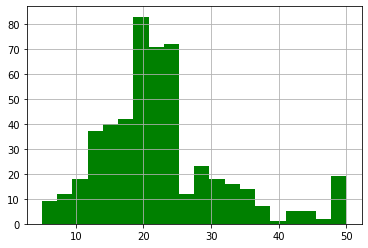

In [47]:

hd['PRICE'].hist(bins = 20,facecolor='g')

In [48]:
corr=hd.corr()
corr.shape

(14, 14)

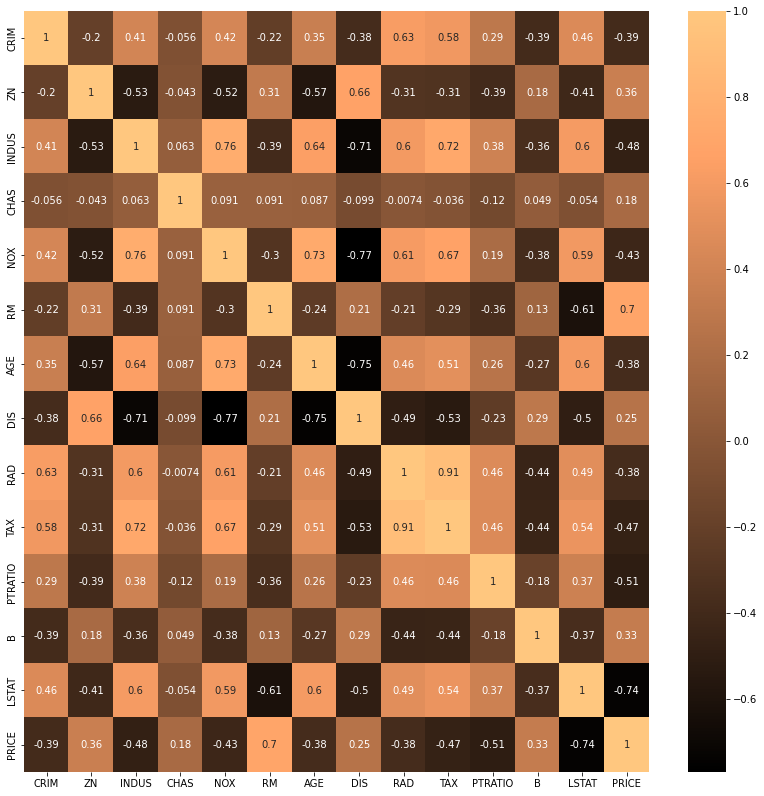

In [49]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, cmap='copper')

**REGRESSION PLOT OF PRICE VS LSTAT**

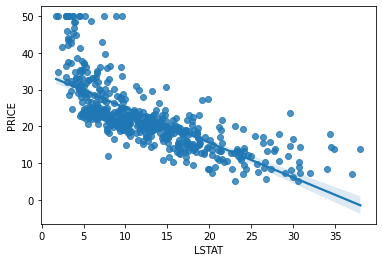

In [50]:
sns.regplot(y=hd['PRICE'], x=hd['LSTAT']) 

**TAKEAWAY:AS THE LSTAT INCREASES,THE PRICE DECREASES**

**REGRESSION PLOT OF PRICE VS RM**


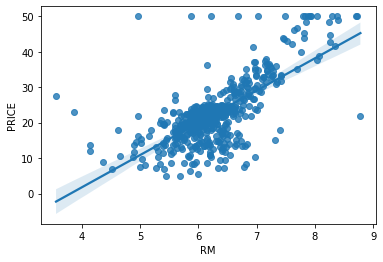

In [51]:
sns.regplot(y=hd['PRICE'], x=hd['RM']) 

**TAKEAWAY:AS THE RM INCREASES,PRICE INCREASES**

**SPLITTING THE DATA AND TARGET**

In [52]:
X=hd.drop(['PRICE'],axis=1)
Y=hd['PRICE']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

**TRAIN-TEST SPLIT**

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


**MODEL TRAINING**



1.   LINEAR REGRESSION



In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
LinearRegression(copy_X=True, fit_intercept=True ,normalize=False)
y_pred=model.predict(X_train)
print("Training accuracy:",model.score(X_train,Y_train)*100)

Training accuracy: 72.85831776605592


In [55]:
print("Training accuracy:",model.score(X_test,Y_test)*100)

Training accuracy: 77.89207451814417


In [56]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model accuracy:",r2_score(Y,model.predict(X))*100)

Model accuracy: 73.87454846256315


**MODEL VISUALIZATION**

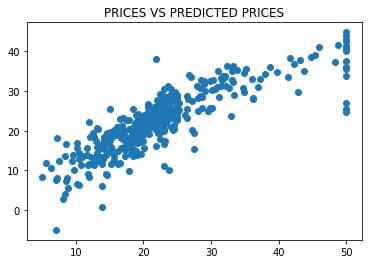

In [57]:
plt.scatter(Y_train,y_pred)
plt.xlabel=("PRICES")
plt.ylabel=("PREDICTED PRICES")
plt.title("PRICES VS PREDICTED PRICES")
plt.show()

2.   RANDOM FOREST REGRESSOR

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_train)
print("Training accuracy:",reg.score(X_train,Y_train)*100)


Training accuracy: 98.25690548152514


In [59]:
print("Testing accuracy:",reg.score(X_test,Y_test)*100)

Testing accuracy: 87.59797366582838


**MODEL VISUALIZATION**

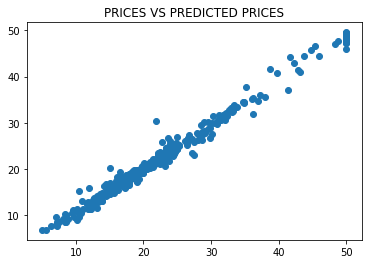

In [60]:
plt.scatter(Y_train,y_pred)
plt.xlabel=("PRICES")
plt.ylabel=("PREDICTED PRICES")
plt.title("PRICES VS PREDICTED PRICES")
plt.show()

# **CONCLUSION**: We got the more accuracy score using RandomForestRegressor